
# Mandatory Assignment 1, Machine Learning

### Necessary imports

In [541]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("WineQT.csv")

### 1.1 Data exploration

#### Q1.1.1

In [542]:
print("First 5 rows of dataset:\n")
print(df.head())

print("\nDataset Info:\n")
print(df.info())

print("\nSummary Statistics:\n")
print(df.describe().sort_values(by="std", axis=1, ascending=False))

First 5 rows of dataset:

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9

#### Q1.2.1)
By using the below code snippit we can sort the entries in the dataframe based on variation. Total sulfur dioxide has the highest variation in our dataset with a value of 32.8.

In [543]:
print(df.describe().sort_values(by="std", axis=1, ascending=False))

                Id  total sulfur dioxide  free sulfur dioxide  fixed acidity  \
count  1143.000000           1143.000000          1143.000000    1143.000000   
mean    804.969379             45.914698            15.615486       8.311111   
std     463.997116             32.782130            10.250486       1.747595   
min       0.000000              6.000000             1.000000       4.600000   
25%     411.000000             21.000000             7.000000       7.100000   
50%     794.000000             37.000000            13.000000       7.900000   
75%    1209.500000             61.000000            21.000000       9.100000   
max    1597.000000            289.000000            68.000000      15.900000   

       residual sugar      alcohol      quality  citric acid  \
count     1143.000000  1143.000000  1143.000000  1143.000000   
mean         2.532152    10.442111     5.657043     0.268364   
std          1.355917     1.082196     0.805824     0.196686   
min          0.900000  

### 1.2 Correlation Analysis

#### Q1.2.1)

In [544]:
corr = df.corr()

#### Q1.2.2)

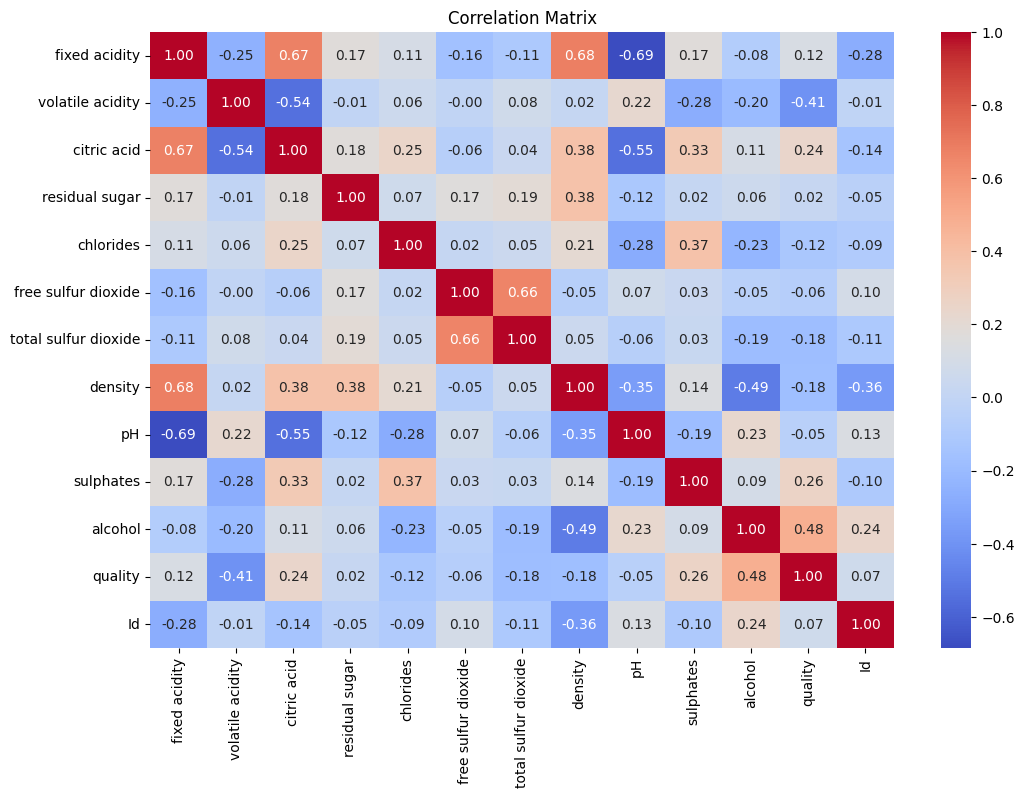

In [545]:
plt.figure(figsize=(12, 8))
plt.title("Correlation Matrix")
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()

#### Q1.2.3)

In [546]:
quality_corr = df.corr()["quality"].drop("quality")

strongest_pos = quality_corr.idxmax(), quality_corr.max()
strongest_neg = quality_corr.idxmin(), quality_corr.min()

print(quality_corr)

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
Id                      0.069708
Name: quality, dtype: float64


#### Q1.2.4)
If we print out quality_corr, we find the values for each entrys correlation to quality. We can then compare pH and alcohol. We find that alcohol has a stronger correlation than pH, meaning its the better predictor of good quality wine.

### 1.3 Linear Regression
#### Define Functions for this section:

In [547]:
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

def gradient_descent(X, y, alpha=0.01, n_iter=10000):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(n_iter):
        preds = X @ theta
        grad = (1/m) * (X.T @ (preds - y))
        theta -= alpha * grad
    return theta

def run_regression_chloride(learning_rate=0.01, n=12000):
    y = df["quality"].values.astype(float)
    X = df["chlorides"].values.astype(float)
    Xb = add_bias(X)

    results = gradient_descent(Xb, y, alpha=learning_rate, n_iter=n)
    print(f"Chlorides Regression Results:")
    print("Intercept:", results[0])
    print("Slope:", results[1])

    # Plot
    plt.scatter(X, y, s=10, alpha=0.6, label="Data")
    x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
    X_line = add_bias(x_line)
    y_line = X_line @ results
    plt.plot(x_line, y_line, color="red", label="Regression line")
    plt.xlabel("Chlorides"); plt.ylabel("quality")
    plt.title(f"Linear regression: quality ~ Chlorides")
    plt.legend(); plt.show()
    
    return results


def run_regression_alcohol(learning_rate=0.01, n=12000):
    y = df["quality"].values.astype(float)
    X = df["alcohol"].values.astype(float)
    Xb = add_bias(X)

    results = gradient_descent(Xb, y, alpha=learning_rate, n_iter=n)
    print(f"Alcohol Regression Results:")
    print("Intercept:", results[0])
    print("Slope:", results[1])

    # Plot
    plt.scatter(X, y, s=10, alpha=0.6, label="Data")
    x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
    X_line = add_bias(x_line)
    y_line = X_line @ results
    plt.plot(x_line, y_line, color="red", label="Regression line")
    plt.xlabel("Alcohol"); plt.ylabel("quality")
    plt.title(f"Linear regression: quality ~ Chlorides")
    plt.legend(); plt.show()
    
    return results
    
    
    
    

### Q1.3.1

Chlorides Regression Results:
Intercept: 5.66699494467208
Slope: -0.11891332962353725


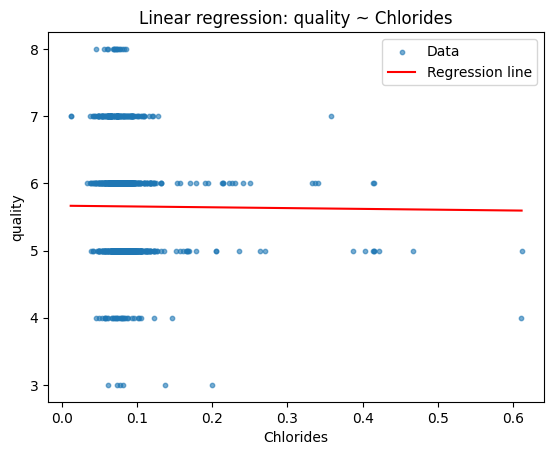

In [548]:
results_chlor = run_regression_chloride()

### Q1.3.2)
I used the same code as in 1.3.1, just swapped out the X values for the ones with alcohol.

Alcohol Regression Results:
Intercept: 1.367601946633998
Slope: 0.4102594797643658


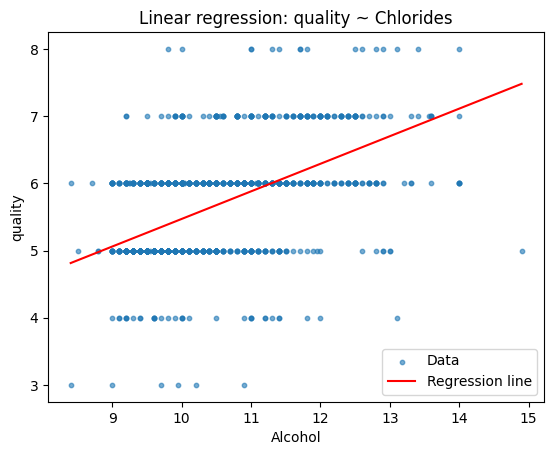

In [549]:
results_alcohol = run_regression_alcohol()

### Q1.3.3

In [550]:
# Report the regression coefficient and intercept and compare both the models
print("Clorides Model :")
print(f"  Coefficient: {round(results_chlor[0],3)}")
print(f"  Intercept: {round(results_chlor[1],3)}")

print("\nAlcohol Model:")
print(f"  Coefficient: {round(results_alcohol[0],3)}")
print(f"  Intercept: {round(results_alcohol[1],3)}")

Clorides Model :
  Coefficient: 5.667
  Intercept: -0.119

Alcohol Model:
  Coefficient: 1.368
  Intercept: 0.41


### Q1.3.4)

Plots are included in the code snippets above

For both, the regression line fits based on the expected results. The regression line has a small slope on the clorides, meaning that chlorides wont affect the quality as much as alcohol. Where we see a clear positive linear line upwards. This is to be expected, as we found that alcohol had a strong positive correlation with the quality. 

### 1.4 Train-test Split
#### Q1.4.1)

In [551]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(df), 1):
    
    # convert to 1D arrays or else gradient descent will give alot of error messages
    x_train, x_test = df[['alcohol']].iloc[train_idx].values.flatten(), df[['alcohol']].iloc[test_idx].values.flatten()
    y_train, y_test = df['quality'].iloc[train_idx], df['quality'].iloc[test_idx]
    
    x_train_norm = (x_train - np.mean(x_train)) / np.std(x_train)
    x_test_norm = (x_test - np.mean(x_train)) / np.std(x_train)

    X_train = np.c_[np.ones(len(x_train_norm)), x_train_norm]
    X_test = np.c_[np.ones(len(x_test_norm)), x_test_norm]

    # Using gradient descent function from task 1.3.1
    theta = gradient_descent(X_train, y_train.values, alpha=0.01, n_iter=1000)

    # Predictions
    y_pred = X_test @ theta

    # Evaluation metrics (How well did the model preform?)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Fold {fold}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}\n")

print(f"Average slope (m): {theta[1]}")
print(f"Average intercept (b): {theta[0]}")

Fold 1:
MSE: 0.4175
RMSE: 0.6462
R²: 0.2497

Fold 2:
MSE: 0.5900
RMSE: 0.7681
R²: 0.1988

Fold 3:
MSE: 0.5140
RMSE: 0.7169
R²: 0.2415

Fold 4:
MSE: 0.4998
RMSE: 0.7070
R²: 0.2677

Fold 5:
MSE: 0.4632
RMSE: 0.6806
R²: 0.2125

Average slope (m): 0.3983726976406424
Average intercept (b): 5.646750747720904


Based on the Rsquared values we find that alcohol explains about 20-27% of the variance in wine quality. This means that alcohol is a considerable variable, however its not the main factor in what makes a good quality wine. Most of the variation comes from other factors. I would say wine is a medium positive predictor of what makes a good quality wine. The predictions from the model based on alcohol levels show about a 0.7 ish variance in quality points on average.

#### Q1.4.2)

In [552]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(df), 1):
    
    # convert to 1D arrays or else gradient descent will give alot of error messages
    x_train, x_test = df[['chlorides']].iloc[train_idx].values.flatten(), df[['chlorides']].iloc[test_idx].values.flatten()
    y_train, y_test = df['quality'].iloc[train_idx], df['quality'].iloc[test_idx]
    
    x_train_norm = (x_train - np.mean(x_train)) / np.std(x_train)
    x_test_norm = (x_test - np.mean(x_train)) / np.std(x_train)

    X_train = np.c_[np.ones(len(x_train_norm)), x_train_norm]
    X_test = np.c_[np.ones(len(x_test_norm)), x_test_norm]

    # Using gradient descent function from task 1.3.1
    theta_multiple = gradient_descent(X_train, y_train.values, alpha=0.01, n_iter=1000)

    # Predictions
    y_pred = X_test @ theta_multiple

    # Evaluation metrics (How well did the model preform?)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Fold {fold}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}\n")

print(f"Average slope (m): {theta_multiple[1]}")
print(f"Average intercept (b): {theta_multiple[0]}")

Fold 1:
MSE: 0.5591
RMSE: 0.7478
R²: -0.0048

Fold 2:
MSE: 0.7266
RMSE: 0.8524
R²: 0.0133

Fold 3:
MSE: 0.6591
RMSE: 0.8118
R²: 0.0274

Fold 4:
MSE: 0.6658
RMSE: 0.8160
R²: 0.0246

Fold 5:
MSE: 0.5916
RMSE: 0.7692
R²: -0.0058

Average slope (m): -0.11141479795204294
Average intercept (b): 5.646750747720904


Chlorides RMSE range is slightly worse than alcohol with around 0.8 quality points. The R squared values is extremely low for chlorides, meaning that the amount of chlorides in alcohol has very little meaning for the quality of the wine, with essentially a value of 0.

#### Q1.4.3)
Yes the model does underfit by quite alot. If we look at the RMSE values we can see the model varies by around 0.8 quality points. Going back to task 1.2.1 we can see that the quality points has a min value of 3 and max value of 8, having an RMSE value of almost 1 here is quite inaccurate. There could be multiple reasons as to why our model underfits, but i believe its because we try and fit a linear regression when something less linear could be a better fit for us.

### Q1.4.4)
It has already been explained in question 1.4.1 and 2, but ill repeat and say that since the R squared value of alcohol is bigger, it is clearly better at predicting wine quality. It also has a lower RMSE, meaning that its slightly more accurate.

### 1.5 Multiple Linear Regression
#### Q1.5.1)

In [553]:
# Prepare cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores, rmse_scores, r2_scores = [], [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(df), 1):
    # Split into train/test, main difference lies here compared to 1.4.1 and 2
    X_train, X_test = df.drop(columns=['quality']).iloc[train_idx], df.drop(columns=['quality']).iloc[test_idx]
    y_train, y_test = df['quality'].iloc[train_idx], df['quality'].iloc[test_idx]

    X_train_norm = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    X_test_norm = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

    # Add bias column (intercept)
    X_train_bias = np.c_[np.ones(len(X_train_norm)), X_train_norm]
    X_test_bias = np.c_[np.ones(len(X_test_norm)), X_test_norm]

    theta_multiple = gradient_descent(X_train_bias, y_train.values, alpha=0.01, n_iter=1000)

    # Predict
    y_pred = X_test_bias @ theta_multiple

    # Evaluate Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f"Fold {fold}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}\n")

print("Overall Performance (5 folds):")
print(f"Mean MSE: {np.mean(mse_scores):.4f}, Variance: {np.var(mse_scores):.4f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}, Variance: {np.var(rmse_scores):.4f}")
print(f"Mean R²: {np.mean(r2_scores):.4f}, Variance: {np.var(r2_scores):.4f}")


Fold 1:
MSE: 0.3809
RMSE: 0.6172
R²: 0.3154

Fold 2:
MSE: 0.4840
RMSE: 0.6957
R²: 0.3428

Fold 3:
MSE: 0.4320
RMSE: 0.6573
R²: 0.3625

Fold 4:
MSE: 0.4094
RMSE: 0.6399
R²: 0.4002

Fold 5:
MSE: 0.3764
RMSE: 0.6135
R²: 0.3601

Overall Performance (5 folds):
Mean MSE: 0.4166, Variance: 0.0015
Mean RMSE: 0.6447, Variance: 0.0009
Mean R²: 0.3562, Variance: 0.0008


### Q1.5.2)

Compared to simple linear regression with alcohol or chlorides alone, the multiple linear regression model preforms way better. The mean RMSE decreased from 0.7 to 0.65, and the R2 improved from 0.23 to 0.36. This shows that while alcohol is a good predictor of wine, including all the different values from WineQT.csv results in a more accurate model.

### Q1.5.3)

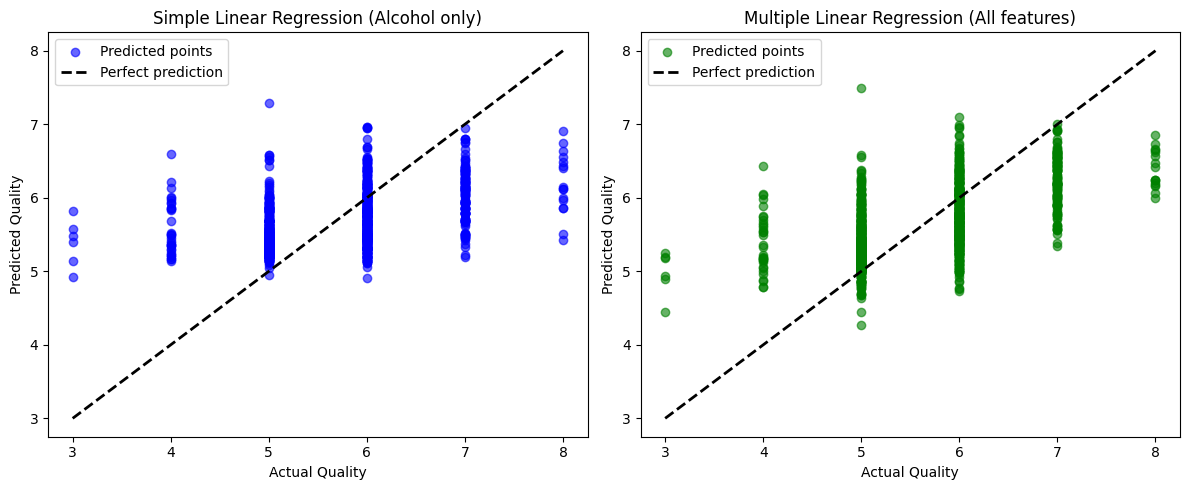

In [ ]:
all_y_test_slr, all_y_pred_slr = [], []
all_y_test_mlr, all_y_pred_mlr = [], []

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in kf.split(df):
    x_train, x_test = df[['alcohol']].iloc[train_idx].values.flatten(), df[['alcohol']].iloc[test_idx].values.flatten()
    y_train, y_test = df['quality'].iloc[train_idx], df['quality'].iloc[test_idx]

    x_train_norm = (x_train - np.mean(x_train)) / np.std(x_train)
    x_test_norm = (x_test - np.mean(x_train)) / np.std(x_train)

    X_train = np.c_[np.ones(len(x_train_norm)), x_train_norm]
    X_test = np.c_[np.ones(len(x_test_norm)), x_test_norm]

    theta = gradient_descent(X_train, y_train.values, alpha=0.01, n_iter=1000)
    y_pred = X_test @ theta

    all_y_test_slr.extend(y_test.values)
    all_y_pred_slr.extend(y_pred)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in kf.split(df):
    X_train, X_test = df.drop(columns=['quality']).iloc[train_idx], df.drop(columns=['quality']).iloc[test_idx]
    y_train, y_test = df['quality'].iloc[train_idx], df['quality'].iloc[test_idx]

    X_train_norm = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    X_test_norm = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

    X_train_bias = np.c_[np.ones(len(X_train_norm)), X_train_norm]
    X_test_bias = np.c_[np.ones(len(X_test_norm)), X_test_norm]

    theta_multiple = gradient_descent(X_train_bias, y_train.values, alpha=0.01, n_iter=1000)
    y_pred = X_test_bias @ theta_multiple

    all_y_test_mlr.extend(y_test.values)
    all_y_pred_mlr.extend(y_pred)

plt.figure(figsize=(12,5))

# Simple Linear Regression
plt.subplot(1,2,1)
plt.scatter(all_y_test_slr, all_y_pred_slr, alpha=0.6, color='blue', label="Predicted points")
plt.plot([min(all_y_test_slr), max(all_y_test_slr)],
         [min(all_y_test_slr), max(all_y_test_slr)], 'k--', lw=2, label="Perfect prediction")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Simple Linear Regression (Alcohol only)")
plt.legend()

# Multiple Linear Regression
plt.subplot(1,2,2)
plt.scatter(all_y_test_mlr, all_y_pred_mlr, alpha=0.6, color='green', label="Predicted points")
plt.plot([min(all_y_test_mlr), max(all_y_test_mlr)],
         [min(all_y_test_mlr), max(all_y_test_mlr)], 'k--', lw=2, label="Perfect prediction")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Multiple Linear Regression (All features)")
plt.legend()

plt.tight_layout()
plt.show()




### Q1.5.4)
It is explained in 1.5.2, but ill repeat it here. Since the Multiple linear regression results show a bigger r2 value, we can assume that it has more to say in what makes a good quality wine than only the alcohol, though they both are pretty close in values.

## Exercise-2
#### Q2.1
If we go back to task Q1.2.1) We can print out quality_corr, and find that the features with the highest correlation for good quality wine is:

Alcohol -> 0.48

Volatile acidity -> -0.41

Sulphates -> 0.26

Citric acid -> 0.24

These values have the strongest correlation with wine quality in the .csv file.

### Q2.2 a)


In [ ]:
polynomial = PolynomialFeatures(degree=2, include_bias=False)
X_transformed = polynomial.fit_transform(df.drop(columns=['quality']))
X_polyframe = pd.DataFrame(X_transformed, columns=polynomial.get_feature_names_out(df.drop(columns=['quality']).columns))

target = df['quality'].values

folds = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list, rmse_list, r2_list = [], [], []

print("Polynomial Regression (degree=2 with interactions):")
for idx, (train_idx, test_idx) in enumerate(folds.split(X_polyframe), start=1):
    X_tr, X_te = X_polyframe.iloc[train_idx], X_polyframe.iloc[test_idx]
    y_tr, y_te = target[train_idx], target[test_idx]

    # Train the model
    poly_model = LinearRegression()
    poly_model.fit(X_tr, y_tr)

    # Test predictions
    y_pred = poly_model.predict(X_te)

    # evaluation metrics
    mse_val = mean_squared_error(y_te, y_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_te, y_pred)

    mse_list.append(mse_val)
    rmse_list.append(rmse_val)
    r2_list.append(r2_val)

    print(f"Fold {idx}:")
    print(f"  MSE: {mse_val:.4f}")
    print(f"  RMSE: {rmse_val:.4f}")
    print(f"  R²: {r2_val:.4f}\n")

print("Cross-validated Performance:")
print(f"  Mean MSE: {np.mean(mse_list):.4f}")
print(f"  Mean RMSE: {np.mean(rmse_list):.4f}")
print(f"  Mean R²: {np.mean(r2_list):.4f}")


Polynomial Regression (degree=2 with interactions):
Fold 1:
  MSE: 0.4019
  RMSE: 0.6340
  R²: 0.2778

Fold 2:
  MSE: 0.5100
  RMSE: 0.7141
  R²: 0.3075

Fold 3:
  MSE: 0.4796
  RMSE: 0.6926
  R²: 0.2922

Fold 4:
  MSE: 0.4149
  RMSE: 0.6441
  R²: 0.3921

Fold 5:
  MSE: 0.5066
  RMSE: 0.7118
  R²: 0.1388

Cross-validated Performance:
  Mean MSE: 0.4626
  Mean RMSE: 0.6793
  Mean R²: 0.2817


The mean R² across multiple linear regression was : 0.3562, while here it is 0.2817. It has a lower R² than the multiple one, which we can interprete as non increase in preformance.

### Q2.2 b)

In [556]:
X = df.drop(columns=['quality'])
y = df['quality']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y, kf):
    mse_scores, r2_scores = [], []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse_scores.append(mean_squared_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))
    return np.mean(mse_scores), np.mean(r2_scores), model.coef_

ridge = Ridge(alpha=1.0)
ridge_mse, ridge_r2, ridge_coefs = evaluate_model(ridge, X, y, kf)

lasso = Lasso(alpha=0.01, max_iter=10000)  # alpha must be tuned
lasso_mse, lasso_r2, lasso_coefs = evaluate_model(lasso, X, y, kf)

print("Ridge Regression:")
print(f"  Mean MSE: {ridge_mse:.4f}, Mean R²: {ridge_r2:.4f}")
print(f"  Coefficients: {ridge_coefs}\n")

print("Lasso Regression:")
print(f"  Mean MSE: {lasso_mse:.4f}, Mean R²: {lasso_r2:.4f}")
print(f"  Coefficients: {lasso_coefs}\n")

Ridge Regression:
  Mean MSE: 0.4169, Mean R²: 0.3562
  Coefficients: [ 1.58577977e-02 -1.11373719e+00 -2.11142280e-01 -2.22426348e-03
 -1.22512116e+00  1.98493479e-03 -2.50506924e-03 -1.03025467e-02
 -4.75175306e-01  7.64426357e-01  3.20009461e-01 -2.87978289e-05]

Lasso Regression:
  Mean MSE: 0.4248, Mean R²: 0.3452
  Coefficients: [ 3.65279737e-02 -8.84299135e-01  0.00000000e+00 -2.75066989e-03
 -0.00000000e+00  2.23138587e-03 -2.44229255e-03 -0.00000000e+00
 -0.00000000e+00  3.53113238e-01  3.19408465e-01 -1.74899579e-05]



Both models improved generalization compared to the linear regression, they do this by penalizing large coeffcients. Ridge divides in coefficients more smoothly than lasso, meaning that all the values contribute a little bit to the quality of the wine, however the lasso has some values at 0, meaning that it entirely cuts out the values it thinks wont contribute to the quality as much.

Knowing this we can see that ridge has a little better preformance than lasso with a higher R² and lower MSE.

# Q2.2 c)

In [557]:
X = df.drop(columns=['quality'])
y = df['quality']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y, kf):
    mse_scores, r2_scores = [], []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse_scores.append(mean_squared_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))
    return np.mean(mse_scores), np.mean(r2_scores)

lin = LinearRegression()
mse_lin, r2_lin = evaluate_model(lin, X, y, kf)

print("Linear Regression:")
print(f"  Mean MSE: {mse_lin:.4f}, Mean R²: {r2_lin:.4f}")

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
mse_dt, r2_dt = evaluate_model(dt, X, y, kf)

print("Decision Tree Regression:")
print(f"  Mean MSE: {mse_dt:.4f}, Mean R²: {r2_dt:.4f}")


Linear Regression:
  Mean MSE: 0.4170, Mean R²: 0.3553
Decision Tree Regression:
  Mean MSE: 0.5091, Mean R²: 0.2114


Decision tree's RMSE is pretty low compared to other models, meaning that the guesses it makes will be more confident than the other models. However, the R² is lower compared to other models. This means that it is not a better predictor of quality wine than other models. Compared to the sklearns LinearRegression function, it does worse on all accounts.